# George Hsu 50436963

## Research question/interests

How did trading price, performance and volatility timing react during the period of COVID-19?

In this research, the goal is to determine the price response, performance and timing of volatility of US funds during the Covid-19 outbreak by analyzing the time period of September 2020 to November 2021. 

Plan of analysis: For the price reaction, I will implement an event study approach to assess if there were certain events, such as government policy or weather disaster that caused the price fluctuate during the different periods. To determine the market performance across different period, I will study the complete period and then each of the quarterly separately. To be consistent with the performance analysis, I will evaluate the timing of volatility over the entire period as well as four quarters.


In [ ]:
import pandas as pd
df = pd.read_csv('../data/raw/MutualFunds.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23783 entries, 0 to 23782
Columns: 298 entries, fund_symbol to peer_governance_max
dtypes: float64(277), object(21)
memory usage: 54.1+ MB


,fund_symbol,quote_type,region,fund_short_name,fund_long_name,currency,initial_investment,subsequent_investment,fund_category,fund_family,...,peer_environment_avg,peer_environment_max,social_score,peer_social_min,peer_social_avg,peer_social_max,governance_score,peer_governance_min,peer_governance_avg,peer_governance_max
0,AAAAX,MutualFund,US,DWS RREEF Real Assets Fund - Cl,DWS RREEF Real Assets Fund - Class A,USD,1000.0,50.0,World Allocation,DWS,...,5.05,10.58,7.43,5.98,9.07,11.30,5.43,4.26,7.14,8.11
1,AAAEX,MutualFund,US,AllianzGI Health Sciences Fund,Virtus AllianzGI Health Sciences Fund Class P,USD,1000000.0,NaN,Health,Virtus,...,1.43,3.27,12.96,9.52,12.87,15.08,8.40,4.96,7.68,10.30
2,AAAFX,MutualFund,US,NaN,American Century One Choice Blend+ 2015 Portfo...,USD,2500.0,50.0,Target-Date 2015,American Century Investments,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AAAGX,MutualFund,US,Thrivent Large Cap Growth Fund,Thrivent Large Cap Growth Fund Class A,USD,2000.0,50.0,Large Growth,Thrivent Funds,...,2.70,5.81,10.13,7.25,10.14,11.97,8.03,5.30,7.54,8.90
4,AAAHX,MutualFund,US,NaN,American Century One Choice Blend+ 2015 Portfo...,USD,5000000.0,NaN,Target-Date 2015,American Century Investments,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Checking duplicated entries

In [ ]:
if len(df[df.duplicated()]) > 0:
    print("No. of duplicated entries: ", len(df[df.duplicated()]))
    print(df[df.duplicated(keep=False)].sort_values(by=list(df.columns)).head())
else:
    print("No duplicated entries found")

No duplicated entries found


Summarize different values for numeric variables

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
initial_investment,16485.0,5.179181e+06,9.253584e+07,10.0000,1.000000e+03,2.500000e+03,5.000000e+05,5.000000e+09
subsequent_investment,8943.0,1.015926e+03,1.102397e+04,1.0000,5.000000e+01,5.000000e+01,1.000000e+02,5.000000e+05
total_net_assets,23749.0,4.924192e+09,2.109765e+10,10.0000,1.445834e+08,6.443283e+08,2.453409e+09,7.534100e+11
year_to_date_return,23382.0,9.348512e-02,8.227648e-02,-0.5228,2.610000e-02,9.200000e-02,1.497000e-01,5.789000e-01
day50_moving_average,23782.0,2.363873e+01,3.312631e+01,1.2790,1.099725e+01,1.495950e+01,2.518450e+01,2.018338e+03
...,...,...,...,...,...,...,...,...
peer_social_max,14839.0,1.130824e+01,1.732701e+00,5.8600,1.071000e+01,1.152000e+01,1.204000e+01,1.725000e+01
governance_score,15388.0,6.210819e+00,2.800713e+00,0.0000,6.230000e+00,7.350000e+00,7.740000e+00,1.402000e+01
peer_governance_min,14839.0,5.387539e+00,7.481764e-01,2.6100,5.050000e+00,5.300000e+00,5.830000e+00,1.165000e+01
peer_governance_avg,14839.0,7.219275e+00,8.207053e-01,3.0400,6.930000e+00,7.420000e+00,7.540000e+00,1.165000e+01


Get the number of rows and columns in the dataset

In [ ]:
df.shape

(23783, 298)

Find out the names of the columns to know what to keep

In [ ]:
print(df.columns.tolist())

['fund_symbol', 'quote_type', 'region', 'fund_short_name', 'fund_long_name', 'currency', 'initial_investment', 'subsequent_investment', 'fund_category', 'fund_family', 'exchange_code', 'exchange_name', 'exchange_timezone', 'management_name', 'management_bio', 'management_start_date', 'total_net_assets', 'year_to_date_return', 'day50_moving_average', 'day200_moving_average', 'week52_high_low_change', 'week52_high_low_change_perc', 'week52_high', 'week52_high_change', 'week52_high_change_perc', 'week52_low', 'week52_low_change', 'week52_low_change_perc', 'investment_strategy', 'fund_yield', 'morningstar_overall_rating', 'morningstar_risk_rating', 'inception_date', 'last_dividend', 'last_cap_gain', 'annual_holdings_turnover', 'investment_type', 'size_type', 'fund_annual_report_net_expense_ratio', 'category_annual_report_net_expense_ratio', 'fund_prospectus_net_expense_ratio', 'fund_prospectus_gross_expense_ratio', 'fund_max_12b1_fee', 'fund_max_front_end_sales_load', 'category_max_front_e

Create a new dataset that keeps the data I need

In [ ]:
df1 = df[['fund_return_2021_q2', 'fund_return_2021_q1', 'fund_return_2020_q4', 'fund_return_2020_q3', 'fund_return_2020_q2', 'category_return_2020']]
df1.head()

,fund_return_2021_q2,fund_return_2021_q1,fund_return_2020_q4,fund_return_2020_q3,fund_return_2020_q2,category_return_2020
0,NaN,0.05893,0.10312,0.04202,0.09750,0.06177
1,NaN,0.03351,NaN,NaN,NaN,0.27625
2,NaN,NaN,NaN,NaN,NaN,0.10747
3,NaN,0.01176,0.09448,0.13780,0.28807,0.35862
4,NaN,NaN,NaN,NaN,NaN,0.10747


Get the information for the new dataset

In [ ]:
df1.describe()

,fund_return_2021_q2,fund_return_2021_q1,fund_return_2020_q4,fund_return_2020_q3,fund_return_2020_q2,category_return_2020
count,3617.000000,23307.000000,22462.000000,22601.000000,22840.000000,22887.000000
mean,0.044699,0.037370,0.117365,0.052842,0.150852,0.122136
std,0.031555,0.060333,0.089395,0.046759,0.104610,0.117956
min,-0.044300,-0.263210,-0.550590,-0.336050,-0.469830,-0.245370
25%,0.020710,-0.000075,0.047215,0.021150,0.075290,0.042970
50%,0.040790,0.025480,0.112725,0.046920,0.147115,0.093030
75%,0.062820,0.060390,0.164658,0.077300,0.207460,0.155180
max,0.211430,0.605420,0.970030,0.471530,0.864200,0.559120


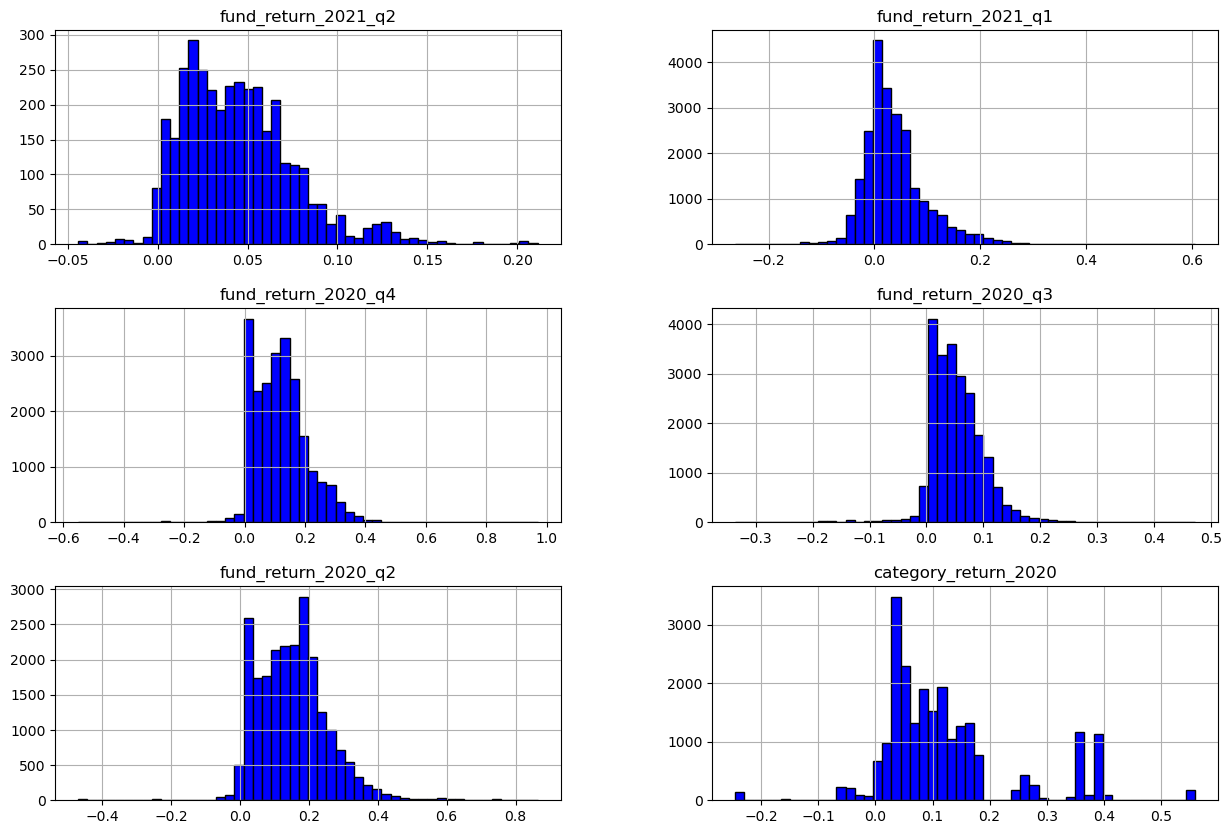

In [ ]:
df1.hist(bins=50, figsize=(15,10), facecolor='blue',edgecolor='black')
plt.show()